In [ ]:
# EDA_flight_price_dataset

**Airline:** Name of the airline operating the flight.

**Date_of_Journey:** Date on which the journey is scheduled.

**Source:** City from where the flight departs.

**Destination:** City where the flight arrives.

**Route:** Path followed by the flight from source to destination.

**Dep_Time:** Scheduled departure time of the flight.

**Arrival_Time:** Scheduled arrival time of the flight.

**Duration:** Total travel time of the flight.

**Total_Stops:** Number of stops between source and destination.

**Additional_Info:** Additional details related to the flight.

**Price:** Ticket cost of the flight (target variable).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('flight_price.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Here Target variable is price

from this info the analyse says most of the features are object, so perform feature Engineering

In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
# feature Engineering
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]

In [ ]:
df['Date']

,Date
0,24
1,1
2,9
3,12
4,01
...,...
10678,9
10679,27
10680,27
10681,01


In [ ]:
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [ ]:
# drop the Date_of_Journey column

df.drop('Date_of_Journey',inplace=True,axis=1)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  object
 11  Month            10683 non-null  object
 12  Year             10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [ ]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Dep_Hour         10683 non-null  object
 14  Dep_Minute       10683 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [ ]:
df['Dep_Hour'] = df['Dep_Hour'].astype(int)
df['Dep_Minute'] = df['Dep_Minute'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Dep_Hour         10683 non-null  int64 
 14  Dep_Minute       10683 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


In [ ]:
df.drop('Dep_Time',axis = 1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [ ]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [ ]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]

In [ ]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Minute       10683 non-null  int64 
 14  Arrival_Hour     10683 non-null  object
 15  Arrival_Minute   10683 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.3+ MB


In [ ]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Minute       10683 non-null  int64 
 14  Arrival_Hour     10683 non-null  int64 
 15  Arrival_Minute   10683 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop('Arrival_Time',axis = 1, inplace = True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [ ]:
df['Duration_Hour'] = df['Duration'].str.extract('(\d+)h')
df['Duration_Minute'] = df['Duration'].str.extract('(\d+)m')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2498017292.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Hour'] = df['Duration'].str.extract('(\d+)h')
/tmp/ipython-input-2498017292.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Minute'] = df['Duration'].str.extract('(\d+)m')


In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
df[df['Duration_Minute'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,NaN
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2 stops,No info,13381,12,6,2019,20,15,19,15,23,NaN
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,22h,2 stops,In-flight meal not included,10919,15,6,2019,14,35,12,35,22,NaN
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1 stop,No info,13062,21,3,2019,9,0,21,0,12,NaN
53,IndiGo,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,3943,18,6,2019,21,15,0,15,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,Jet Airways,Delhi,Cochin,DEL → ATQ → BOM → COK,23h,2 stops,No info,14300,12,6,2019,20,0,19,0,23,NaN
10638,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,14h,1 stop,In-flight meal not included,7832,21,3,2019,21,25,11,25,14,NaN
10639,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,38h,3 stops,No info,10493,3,6,2019,5,15,19,15,38,NaN
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h,2 stops,No info,16704,27,5,2019,13,25,4,25,15,NaN


In [ ]:
df[df['Duration_Hour'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,NaN,5


In [ ]:
df['Duration_Hour'] = df['Duration_Hour'].astype(float)
df['Duration_Minute'] = df['Duration_Minute'].astype(float)

In [ ]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19.0,NaN


In [ ]:
# To handle the missing value
df['Duration_Hour'] = df['Duration_Hour'].fillna(0)
df['Duration_Minute'] = df['Duration_Minute'].fillna(0)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4.0,45.0


In [ ]:
df['Duration_Hour'] = df['Duration_Hour'].astype(int)
df['Duration_Minute'] = df['Duration_Minute'].astype(int)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Dep_Hour         10683 non-null  int64 
 12  Dep_Minute       10683 non-null  int64 
 13  Arrival_Hour     10683 non-null  int64 
 14  Arrival_Minute   10683 non-null  int64 
 15  Duration_Hour    10683 non-null  int64 
 16  Duration_Minute  10683 non-null  int64 
dtypes: int64(10), object(7)
memory 

In [ ]:
# combine Duration_Hour and Duration_Minute into single minute column
df['Total_Duration_Minute'] = df['Duration_Hour']*60 + df['Duration_Minute']

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Total_Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285


In [ ]:
df.drop(['Duration','Duration_Hour','Duration_Minute'],axis=1,inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,285


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Source                 10683 non-null  object
 2   Destination            10683 non-null  object
 3   Route                  10682 non-null  object
 4   Total_Stops            10682 non-null  object
 5   Additional_Info        10683 non-null  object
 6   Price                  10683 non-null  int64 
 7   Date                   10683 non-null  int64 
 8   Month                  10683 non-null  int64 
 9   Year                   10683 non-null  int64 
 10  Dep_Hour               10683 non-null  int64 
 11  Dep_Minute             10683 non-null  int64 
 12  Arrival_Hour           10683 non-null  int64 
 13  Arrival_Minute         10683 non-null  int64 
 14  Total_Duration_Minute  10683 non-null  int64 
dtypes: int64(9), object

In [ ]:
df.drop('Route',axis=1,inplace=True)

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,19,55,22,25,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,11,30,14,10,160


In [ ]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,1
Additional_Info,0
Price,0
Date,0
Month,0
Year,0
Dep_Hour,0


In [ ]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_Minute
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,5,2019,9,45,9,25,1420


In [ ]:
mode_s = df['Total_Stops'].mode().str[0]
mode_s


,Total_Stops
0,1


In [ ]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,1
Additional_Info,0
Price,0
Date,0
Month,0
Year,0
Dep_Hour,0


In [ ]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_Minute
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,5,2019,9,45,9,25,1420


In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'2 stops':2, '1 stop':1,'3 stops':3,'4 stops':4,np.nan:1})

In [ ]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_Minute


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Source                 10683 non-null  object
 2   Destination            10683 non-null  object
 3   Total_Stops            10683 non-null  int64 
 4   Additional_Info        10683 non-null  object
 5   Price                  10683 non-null  int64 
 6   Date                   10683 non-null  int64 
 7   Month                  10683 non-null  int64 
 8   Year                   10683 non-null  int64 
 9   Dep_Hour               10683 non-null  int64 
 10  Dep_Minute             10683 non-null  int64 
 11  Arrival_Hour           10683 non-null  int64 
 12  Arrival_Minute         10683 non-null  int64 
 13  Total_Duration_Minute  10683 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 1.1+ MB


In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
c = df['Additional_Info'].value_counts()
print(c)
df['Additional_Info'] = df['Additional_Info'].str.lower()
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


,count
Additional_Info,
no info,8348
in-flight meal not included,1982
no check-in baggage included,320
1 long layover,19
change airports,7
business class,4
1 short layover,1
red-eye flight,1
2 long layover,1


The Additional_Info column was dropped because it is dominated by ‘no info’ values and contains sparse, unstructured categories with minimal analytical relevance.

In [ ]:
df.drop('Additional_Info',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Source                 10683 non-null  object
 2   Destination            10683 non-null  object
 3   Total_Stops            10683 non-null  int64 
 4   Price                  10683 non-null  int64 
 5   Date                   10683 non-null  int64 
 6   Month                  10683 non-null  int64 
 7   Year                   10683 non-null  int64 
 8   Dep_Hour               10683 non-null  int64 
 9   Dep_Minute             10683 non-null  int64 
 10  Arrival_Hour           10683 non-null  int64 
 11  Arrival_Minute         10683 non-null  int64 
 12  Total_Duration_Minute  10683 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445


In [ ]:
# convert dep_hour and arrival_hour to catogical data

def time_bucket(hour):
  if hour >= 0 and hour < 5:
    return "Late Night"
  elif hour >=5 and hour <8:
    return "Early Morning"
  elif hour >=8 and hour <12:
    return "Morning"
  elif hour >=12 and hour <16:
    return "Afternoon"
  elif hour >=16 and hour <20:
    return "Evening"
  else:
    return "Night"

df['Dep_Hour_bucket'] = df['Dep_Hour'].apply(time_bucket)
df['Arrival_Hour_bucket'] = df['Arrival_Hour'].apply(time_bucket)
df.head(7)



,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170,Night,Late Night
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445,Early Morning,Afternoon
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140,Morning,Late Night
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325,Evening,Night
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285,Evening,Night
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,145,Morning,Morning
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,18,55,10,25,930,Evening,Morning


In [ ]:
df.drop(['Dep_Hour','Arrival_Hour','Dep_Minute','Arrival_Minute'],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,170,Night,Late Night
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,445,Early Morning,Afternoon
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,1140,Morning,Late Night
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,325,Evening,Night
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,285,Evening,Night


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Source                 10683 non-null  object
 2   Destination            10683 non-null  object
 3   Total_Stops            10683 non-null  int64 
 4   Price                  10683 non-null  int64 
 5   Date                   10683 non-null  int64 
 6   Month                  10683 non-null  int64 
 7   Year                   10683 non-null  int64 
 8   Total_Duration_Minute  10683 non-null  int64 
 9   Dep_Hour_bucket        10683 non-null  object
 10  Arrival_Hour_bucket    10683 non-null  object
dtypes: int64(6), object(5)
memory usage: 918.2+ KB


In [ ]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Price,0
Date,0
Month,0
Year,0
Total_Duration_Minute,0
Dep_Hour_bucket,0


In [ ]:
df['Date_of_Journey'] = pd.to_datetime(dict(year=df['Year'],month=df['Month'],day=df['Date']))

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,170,Night,Late Night,2019-03-24
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,445,Early Morning,Afternoon,2019-05-01
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,1140,Morning,Late Night,2019-06-09
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,325,Evening,Night,2019-05-12
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,285,Evening,Night,2019-03-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10683 non-null  object        
 1   Source                 10683 non-null  object        
 2   Destination            10683 non-null  object        
 3   Total_Stops            10683 non-null  int64         
 4   Price                  10683 non-null  int64         
 5   Date                   10683 non-null  int64         
 6   Month                  10683 non-null  int64         
 7   Year                   10683 non-null  int64         
 8   Total_Duration_Minute  10683 non-null  int64         
 9   Dep_Hour_bucket        10683 non-null  object        
 10  Arrival_Hour_bucket    10683 non-null  object        
 11  Date_of_Journey        10683 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 1001

In [ ]:
df['Day_of_week'] = df['Date_of_Journey'].dt.day_name()

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey,Day_of_week
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,170,Night,Late Night,2019-03-24,Sunday
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,445,Early Morning,Afternoon,2019-05-01,Wednesday
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,1140,Morning,Late Night,2019-06-09,Sunday
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,325,Evening,Night,2019-05-12,Sunday
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,285,Evening,Night,2019-03-01,Friday


In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Year,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey,Day_of_week
0,IndiGo,Banglore,New Delhi,0,3897,3,2019,170,Night,Late Night,2019-03-24,Sunday
1,Air India,Kolkata,Banglore,2,7662,5,2019,445,Early Morning,Afternoon,2019-05-01,Wednesday
2,Jet Airways,Delhi,Cochin,2,13882,6,2019,1140,Morning,Late Night,2019-06-09,Sunday
3,IndiGo,Kolkata,Banglore,1,6218,5,2019,325,Evening,Night,2019-05-12,Sunday
4,IndiGo,Banglore,New Delhi,1,13302,3,2019,285,Evening,Night,2019-03-01,Friday


In [ ]:
df['Year'].unique()

array([2019])

In [ ]:
df.drop('Year',axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey,Day_of_week
0,IndiGo,Banglore,New Delhi,0,3897,3,170,Night,Late Night,2019-03-24,Sunday
1,Air India,Kolkata,Banglore,2,7662,5,445,Early Morning,Afternoon,2019-05-01,Wednesday
2,Jet Airways,Delhi,Cochin,2,13882,6,1140,Morning,Late Night,2019-06-09,Sunday
3,IndiGo,Kolkata,Banglore,1,6218,5,325,Evening,Night,2019-05-12,Sunday
4,IndiGo,Banglore,New Delhi,1,13302,3,285,Evening,Night,2019-03-01,Friday


In [ ]:
df['Total_Stops'] = df['Total_Stops'].astype(object)

In [ ]:
df.loc[df['Total_Duration_Minute'] == 5, 'Total_Duration_Minute'] = 300


In [ ]:
df['Source'] = df['Source'].str.strip().replace({'New Delhi': 'Delhi'})
df['Destination'] = df['Destination'].str.strip().replace({'New Delhi': 'Delhi'})


# Analysing

In [ ]:
# descriptive summary
df.describe()



,Price,Month,Total_Duration_Minute,Date_of_Journey
count,10683.000000,10683.000000,10683.000000,10683
mean,9087.064121,4.708602,643.120846,2019-05-04 19:56:41.853412096
min,1759.000000,3.000000,75.000000,2019-03-01 00:00:00
25%,5277.000000,3.000000,170.000000,2019-03-27 00:00:00
50%,8372.000000,5.000000,520.000000,2019-05-15 00:00:00
75%,12373.000000,6.000000,930.000000,2019-06-06 00:00:00
max,79512.000000,6.000000,2860.000000,2019-06-27 00:00:00
std,4611.359167,1.164357,507.835322,NaN


# Observation from the descriptive summary
By seeing this output, I was curious to check the flights where the Duration of flight was maximum (2860 minutes), where the Duration of flight was minimum (75 minutes), where the ticket price of flight was highest (Rs.79512), and where the ticket price of flight was lowest (Rs.1759).

In [ ]:
# Duration of flight was maximum(2860 minutes)

df[df['Total_Duration_Minute']==2860]

,Airline,Source,Destination,Total_Stops,Price,Month,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey,Day_of_week
10456,Jet Airways,Delhi,Cochin,2,20694,3,2860,Evening,Evening,2019-03-06,Wednesday


In [ ]:
# Duration of flight was minimum (75 minutes)

df[df['Total_Duration_Minute']==75]

,Airline,Source,Destination,Total_Stops,Price,Month,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey,Day_of_week
844,Air India,Mumbai,Hyderabad,0,3625,5,75,Evening,Night,2019-05-24,Friday
1301,Air India,Mumbai,Hyderabad,0,3100,5,75,Evening,Night,2019-05-09,Thursday
1322,Air India,Mumbai,Hyderabad,0,5462,3,75,Evening,Night,2019-03-06,Wednesday
1416,Air India,Mumbai,Hyderabad,0,2050,3,75,Evening,Night,2019-03-18,Monday
2083,Air India,Mumbai,Hyderabad,0,2575,3,75,Evening,Night,2019-03-27,Wednesday
2813,Air India,Mumbai,Hyderabad,0,3100,5,75,Evening,Night,2019-05-21,Tuesday
3708,Air India,Mumbai,Hyderabad,0,3100,5,75,Evening,Night,2019-05-01,Wednesday
3986,Air India,Mumbai,Hyderabad,0,3100,5,75,Evening,Night,2019-05-15,Wednesday
4137,Air India,Mumbai,Hyderabad,0,3100,6,75,Evening,Night,2019-06-01,Saturday
4806,Air India,Mumbai,Hyderabad,0,2050,4,75,Evening,Night,2019-04-03,Wednesday


In [ ]:
# Ticket price of flight was highest (79512 Price)

df[df['Price']==79512]

,Airline,Source,Destination,Total_Stops,Price,Month,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey,Day_of_week
2924,Jet Airways Business,Banglore,Delhi,1,79512,3,340,Early Morning,Morning,2019-03-01,Friday


In [ ]:
# Ticket price of flight was lowest (1759 Price)

df[df['Price']==1759]

,Airline,Source,Destination,Total_Stops,Price,Month,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey,Day_of_week
4066,SpiceJet,Mumbai,Hyderabad,0,1759,3,85,Night,Late Night,2019-03-21,Thursday
4274,SpiceJet,Mumbai,Hyderabad,0,1759,3,85,Night,Late Night,2019-03-27,Wednesday
4839,SpiceJet,Mumbai,Hyderabad,0,1759,4,90,Night,Late Night,2019-04-03,Wednesday
10513,SpiceJet,Mumbai,Hyderabad,0,1759,3,80,Early Morning,Early Morning,2019-03-27,Wednesday


In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df['Airline'].nunique()

12

# There are 12 airlines in the dataset

In [ ]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


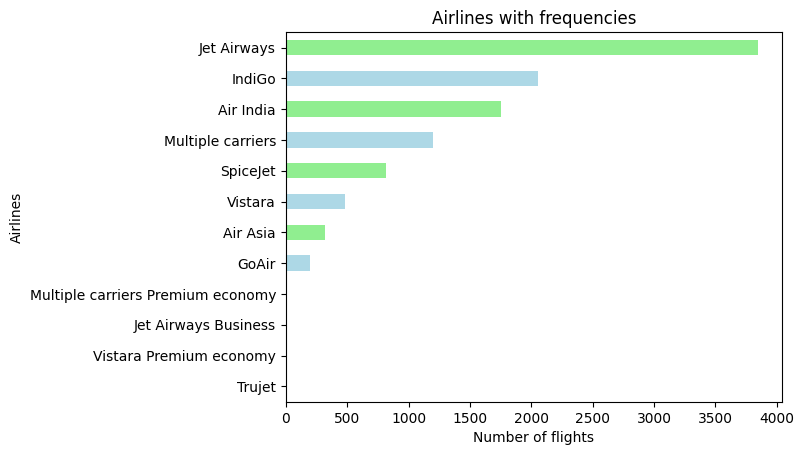

In [ ]:
df['Airline'].value_counts(ascending=True).plot.barh(color=['lightblue','lightgreen'])
plt.title("Airlines with frequencies")
plt.xlabel("Number of flights")
plt.ylabel("Airlines")
plt.show()

#Price Analysis

**What is the distribution of flight prices:**

The flight price distribution is right-skewed, where lower price values have higher frequencies, while higher price values occur less frequently but extend over a wider range.

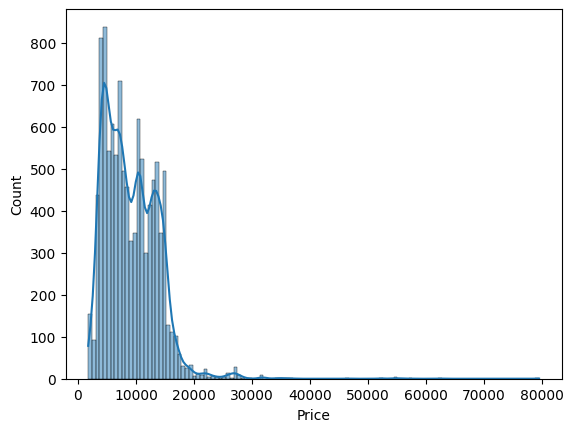

In [ ]:
sns.histplot(x=df['Price'],kde=True)
plt.show()

**Are there extreme outliers in ticket prices?** YES

The boxplot reveals the presence of several upper-end outliers, indicating that a small number of flights are priced significantly higher than the majority.

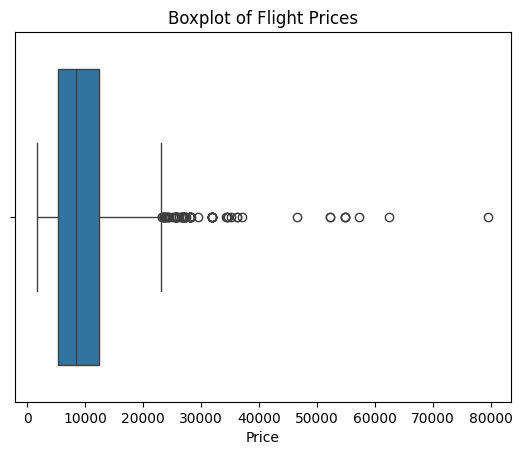

In [ ]:
sns.boxplot(x='Price', data=df)
plt.title('Boxplot of Flight Prices')
plt.show()


#Airline Analysis

**What is the average price for each airline**

The average ticket price varies significantly across airlines.
Budget airlines such as Trujet, SpiceJet, Air Asia, IndiGo, and GoAir have lower average prices, while Jet Airways, Vistara, and Air India fall into a higher price range.
Jet Airways Business has the highest average price, which is expected due to premium service offerings.

In [ ]:
df.groupby('Airline')['Price'].mean().sort_values(ascending=True)

,Price
Airline,
Trujet,4140.000000
SpiceJet,4338.284841
Air Asia,5590.260188
IndiGo,5673.682903
GoAir,5861.056701
Vistara,7796.348643
Vistara Premium economy,8962.333333
Air India,9611.210616
Multiple carriers,10902.678094


**Which airline offers the cheapest flights**: Trujet

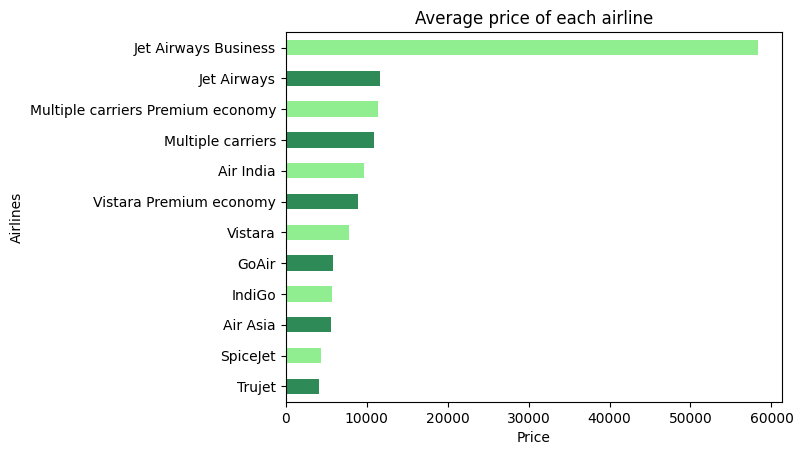

In [ ]:
df.groupby('Airline')['Price'].mean().sort_values(ascending=True).plot.barh(color=['seagreen','lightgreen'])
plt.title("Average price of each airline")
plt.xlabel("Price")
plt.ylabel("Airlines")
plt.show()


**Which airline shows the highest price variation** : Jet Airways Business

In [ ]:
df.groupby('Airline')['Price'].std().sort_values(ascending=True)

,Price
Airline,
Multiple carriers Premium economy,1717.153936
SpiceJet,1849.922514
Air Asia,2027.362290
IndiGo,2264.142168
GoAir,2703.585767
Vistara,2914.298578
Vistara Premium economy,2915.405518
Multiple carriers,3721.234997
Air India,3900.952942


#Source–Destination Analysis

**How does price vary by source city?**

Flight prices vary significantly by source city. Chennai and Mumbai have the lowest average fares, while flights originating from Delhi are the most expensive.


In [ ]:
df['Source'].value_counts()

,count
Source,
Delhi,4537
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [ ]:
df.groupby('Source')['Price'].mean().sort_values(ascending=True)

,Price
Source,
Chennai,4789.892388
Mumbai,5059.708752
Banglore,8017.464269
Kolkata,9158.389411
Delhi,10539.439057


**Which destination has the highest average ticket price?**

Cochin

In [ ]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4537
Banglore,2871
Delhi,2197
Hyderabad,697
Kolkata,381


In [ ]:
df.groupby('Destination')['Price'].mean().sort_values(ascending=False)

,Price
Destination,
Cochin,10539.439057
Banglore,9158.389411
Delhi,8017.464269
Hyderabad,5059.708752
Kolkata,4789.892388


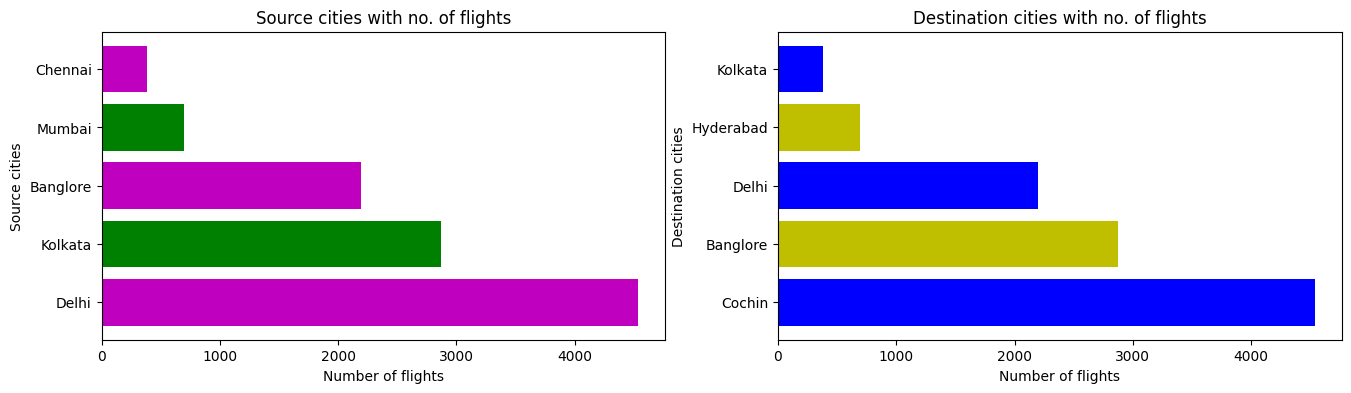

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.barh(df['Source'].value_counts().index,df['Source'].value_counts().values,color=['m','g'])
plt.title("Source cities with no. of flights")
plt.xlabel("Number of flights")
plt.ylabel("Source cities")

plt.subplot(1,2,2)
plt.barh(df['Destination'].value_counts().index,df['Destination'].value_counts().values,color=['b','y'])
plt.title("Destination cities with no. of flights")
plt.xlabel("Number of flights")
plt.ylabel("Destination cities")

plt.show()


**What are the most common source–destination pairs?**

The most common source-destination is Delhi and Cochin

Route frequency analysis shows that Delhi–Cochin is the most common flight route, indicating very high demand and connectivity between these two cities. Other frequently used routes include Kolkata–Bangalore and Bangalore–Delhi.

In [ ]:
df.groupby(['Source','Destination']).size().sort_values(ascending=False)

,,0
Source,Destination,
Delhi,Cochin,4537
Kolkata,Banglore,2871
Banglore,Delhi,2197
Mumbai,Hyderabad,697
Chennai,Kolkata,381


# Time Bucket Analysis


**How does price vary by departure time bucket**

Flight prices vary significantly by departure time. Late-night flights are the cheapest on average, while morning departures are the most expensive. Prices generally increase from late night to morning hours.

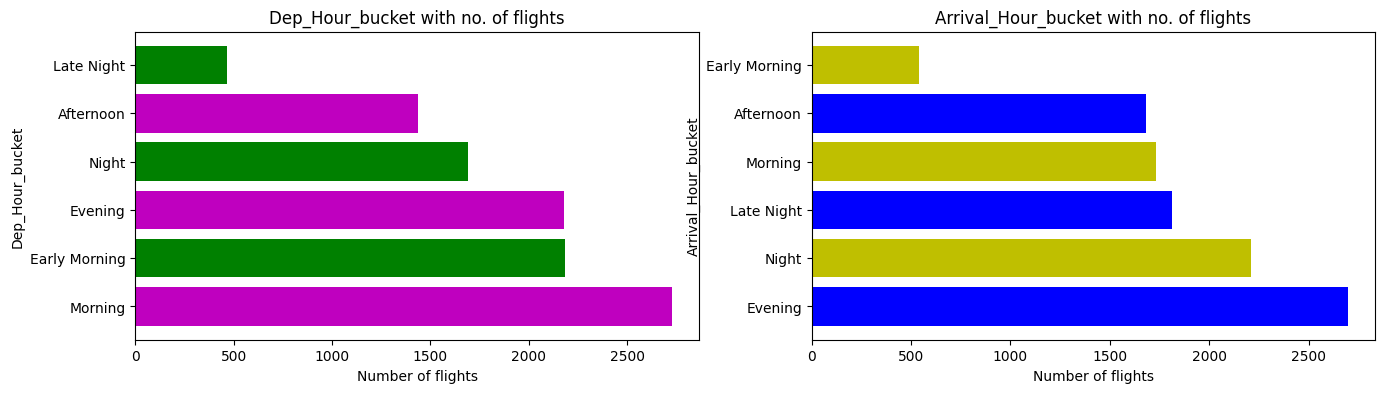

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.barh(df['Dep_Hour_bucket'].value_counts().index,df['Dep_Hour_bucket'].value_counts().values,color=['m','g'])
plt.title("Dep_Hour_bucket with no. of flights")
plt.xlabel("Number of flights")
plt.ylabel("Dep_Hour_bucket")

plt.subplot(1,2,2)
plt.barh(df['Arrival_Hour_bucket'].value_counts().index,df['Arrival_Hour_bucket'].value_counts().values,color=['b','y'])
plt.title("Arrival_Hour_bucket with no. of flights")
plt.xlabel("Number of flights")
plt.ylabel("Arrival_Hour_bucket")
plt.show()

In [ ]:
df.groupby('Dep_Hour_bucket')['Price'].mean().sort_values(ascending=True)

,Price
Dep_Hour_bucket,
Late Night,7706.255914
Early Morning,8780.645900
Night,8883.641041
Afternoon,9088.121086
Evening,9279.257576
Morning,9539.559179


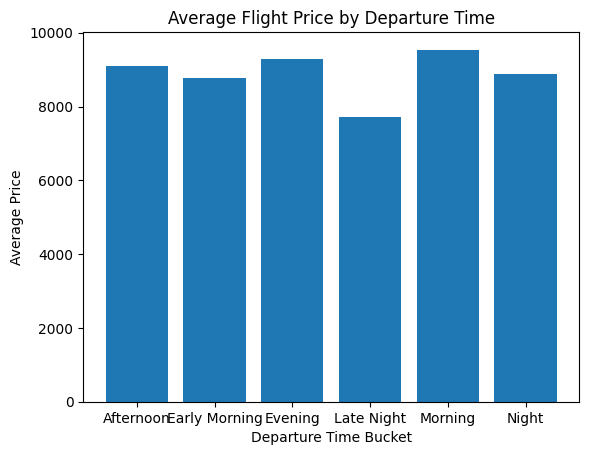

In [ ]:
avg_price = df.groupby('Dep_Hour_bucket')['Price'].mean()

plt.bar(avg_price.index, avg_price.values)
plt.xlabel('Departure Time Bucket')
plt.ylabel('Average Price')
plt.title('Average Flight Price by Departure Time')
plt.show()


**Which departure time bucket has the highest average price?**

Morning

**Are late-night departures cheaper than evening departures?**

Yes

**Does arrival time bucket affect ticket pricing?**

Yes

In [ ]:
df.groupby('Arrival_Hour_bucket')['Price'].mean().sort_values(ascending=True)

,Price
Arrival_Hour_bucket,
Morning,8285.375793
Night,8342.456148
Early Morning,8606.743494
Afternoon,8680.330559
Late Night,9470.926171
Evening,10302.847464


**Does arrival time bucket affect ticket pricing?**


Yes, arrival time impacts ticket pricing, as flights arriving in the Evening and Late Night have significantly higher average prices compared to Morning and Night arrivals.

#Stops & Duration

**How does total stops affect flight price?**

Flight prices increase as the number of total stops increases. Non-stop flights have the lowest average price, while flights with multiple stops are significantly more expensive, indicating a strong positive correlation between total stops and ticket price.

In [ ]:
df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=True)

,Price
Total_Stops,
0,5024.900315
1,10593.570032
2,12715.807895
3,13112.000000
4,17686.000000


**Are non-stop flights significantly more expensive?**

No



**How does total duration relate to price?**

Total duration alone does not clearly define flight pricing. The relationship between duration and price is highly variable, with both short-duration high-price flights and long-duration low-price flights present in the data. This indicates that flight price is influenced by multiple factors beyond duration, such as airline type, route demand, and number of stops.

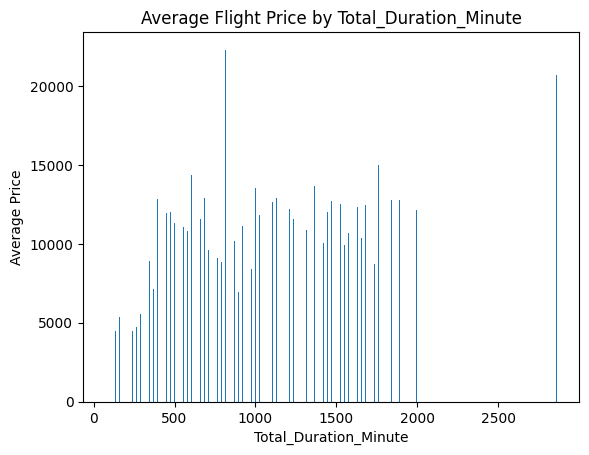

In [ ]:
# df.groupby('Total_Duration_Minute')['Price'].mean().sort_values(ascending=True)

avg_price1 = df.groupby('Total_Duration_Minute')['Price'].mean().sort_values(ascending=True)

plt.bar(avg_price1.index, avg_price1.values)
plt.xlabel('Total_Duration_Minute')
plt.ylabel('Average Price')
plt.title('Average Flight Price by Total_Duration_Minute')
plt.show()

In [ ]:
df.groupby('Total_Duration_Minute')['Price'].mean().sort_values(ascending=True)

,Price
Total_Duration_Minute,
95,2276.133333
80,3286.377049
90,3721.484456
75,3944.333333
235,4226.000000
...,...
2135,19907.000000
2820,20064.000000
2860,20694.000000


#Date & Day Analysis

**Does ticket price vary by month?**

Yes, ticket prices vary by month.

Prices are lowest in April and increase steadily toward March, indicating seasonal demand effects.

In [ ]:
monthly_price = df.groupby('Month')['Price'].mean().sort_values(ascending=True)
monthly_price

,Price
Month,
4,5770.847081
6,8828.796134
5,9127.247548
3,10673.205580


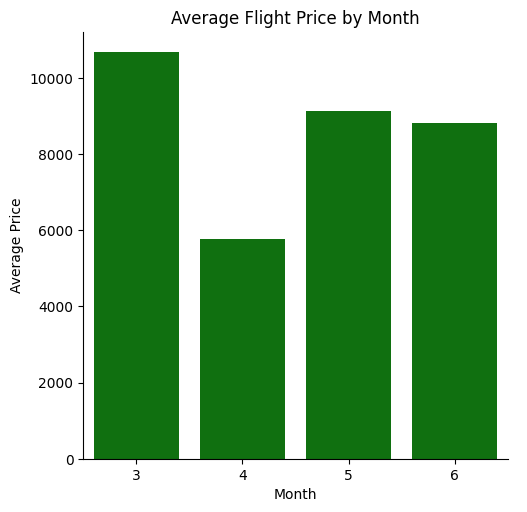

In [ ]:
sns.catplot(x=monthly_price.index,y=monthly_price.values,kind='bar',color='g')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

**Are weekend flights more expensive than weekday flights?**

Weekend flights are not consistently more expensive than weekday flights. While Sunday fares are relatively high, Friday— a weekday— has the highest average price, indicating that demand-driven pricing affects both weekdays and weekends.


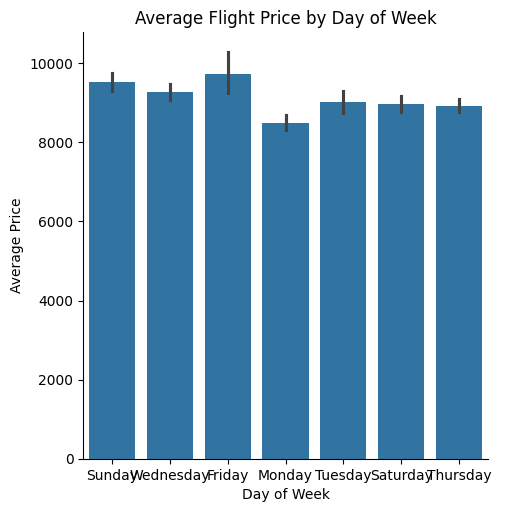

In [ ]:
sns.catplot(x='Day_of_week',y='Price',data=df,kind='bar')
plt.title('Average Flight Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price')
plt.show()

**Which day of the week has the highest average price?**

Friday

In [ ]:
df.groupby('Day_of_week')['Price'].mean().sort_values(ascending=True)

,Price
Day_of_week,
Monday,8499.530811
Thursday,8931.379367
Saturday,8972.905389
Tuesday,9026.149597
Wednesday,9277.514190
Sunday,9525.508820
Friday,9717.996700


In [ ]:
df.groupby(df['Day_of_week'].apply(lambda x: 'weekend' if x in ["Saturday","Sunday"] else 'weekday'))['Price'].mean()

,Price
Day_of_week,
weekday,9026.628731
weekend,9231.982188


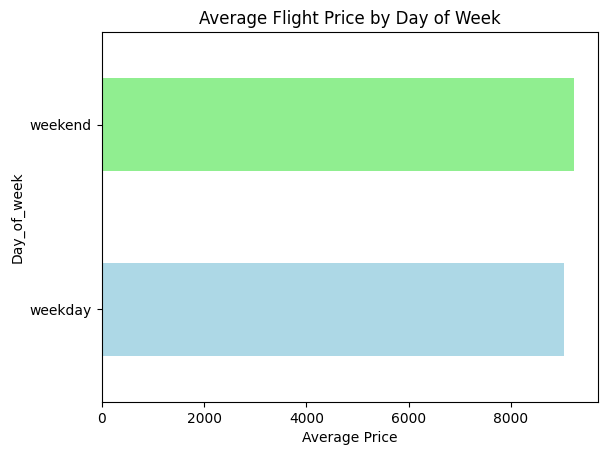

In [ ]:
df.groupby(df['Day_of_week'].apply(lambda x: 'weekend' if x in ["Saturday","Sunday"] else 'weekday'))['Price'].mean().plot.barh(color = ['lightblue','lightgreen'])
plt.title('Average Flight Price by Day of Week')
plt.xlabel('Average Price')
plt.ylabel('Day_of_week')
plt.show()

# Combined Insights

**How does departure time bucket interact with total stops?**

The interaction between departure time and total stops shows that 1-stop flights dominate across all time buckets, especially during Morning and Evening, which have the highest flight volumes. while late-night flights are fewer overall. Flights with multiple stops (3 or 4) are rare regardless of departure time, indicating both passenger preference and airline optimization.



In [ ]:
interact = (df.groupby(['Dep_Hour_bucket','Total_Stops']).size()).reset_index(name='Count')
interact

,Dep_Hour_bucket,Total_Stops,Count
0,Afternoon,0,476
1,Afternoon,1,711
2,Afternoon,2,245
3,Afternoon,3,5
4,Early Morning,0,673
5,Early Morning,1,1091
6,Early Morning,2,396
7,Early Morning,3,22
8,Early Morning,4,1
9,Evening,0,681


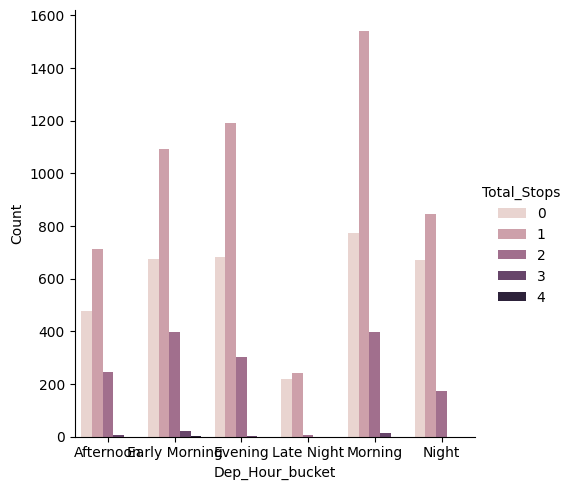

In [ ]:
sns.catplot(
    data=interact,
    x='Dep_Hour_bucket',
    y='Count',
    hue='Total_Stops',
    kind='bar'
)
plt.show()


**Does airline pricing change based on departure time?**

Airline pricing does vary by departure time.

Airline pricing varies significantly by both airline type and departure time. Premium and business-class airlines show strong time-based price fluctuations, with morning and evening flights being the most expensive. Low-cost carriers maintain relatively stable pricing throughout the day, while late-night departures tend to be cheaper across most airlines.


In [ ]:
interact2 = (df.groupby(['Airline','Dep_Hour_bucket'])['Price'].mean()).reset_index()
interact2



,Airline,Dep_Hour_bucket,Price
0,Air Asia,Afternoon,6341.888889
1,Air Asia,Early Morning,6346.027027
2,Air Asia,Evening,6453.614286
3,Air Asia,Late Night,4388.130435
4,Air Asia,Morning,4185.648148
5,Air Asia,Night,5369.719101
6,Air India,Afternoon,8571.959375
7,Air India,Early Morning,10019.608000
8,Air India,Evening,9460.738235
9,Air India,Late Night,11932.789474


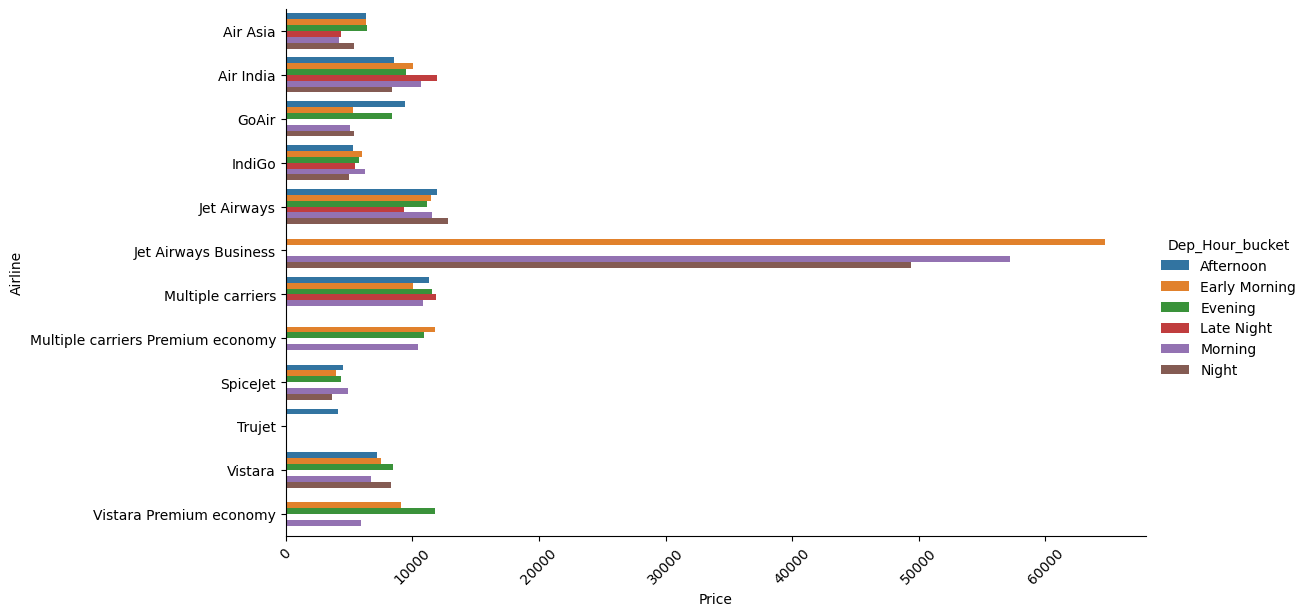

In [ ]:
sns.catplot(data=interact2,x='Price',y='Airline',hue='Dep_Hour_bucket',kind='bar',height=6,aspect=2)
plt.xticks(rotation=45)
plt.show()

**Do long-duration flights tend to have more stops?**

Flights with more stops tend to have longer durations, and flights with 4 stops cover the longest duration on average.


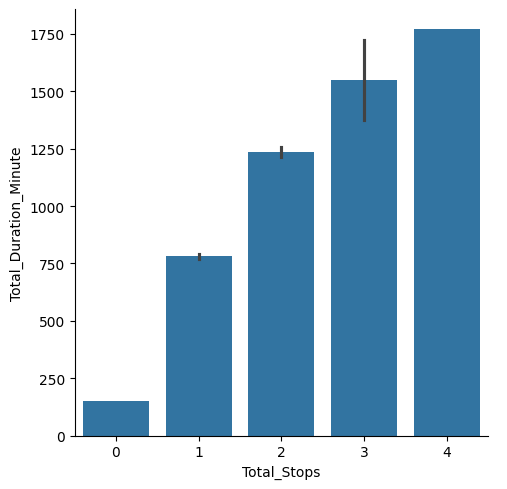

In [ ]:
sns.catplot(data=df,y='Total_Duration_Minute',x='Total_Stops',kind='bar')
plt.show()

In [ ]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Month,Total_Duration_Minute,Dep_Hour_bucket,Arrival_Hour_bucket,Date_of_Journey,Day_of_week
0,IndiGo,Banglore,Delhi,0,3897,3,170,Night,Late Night,2019-03-24,Sunday


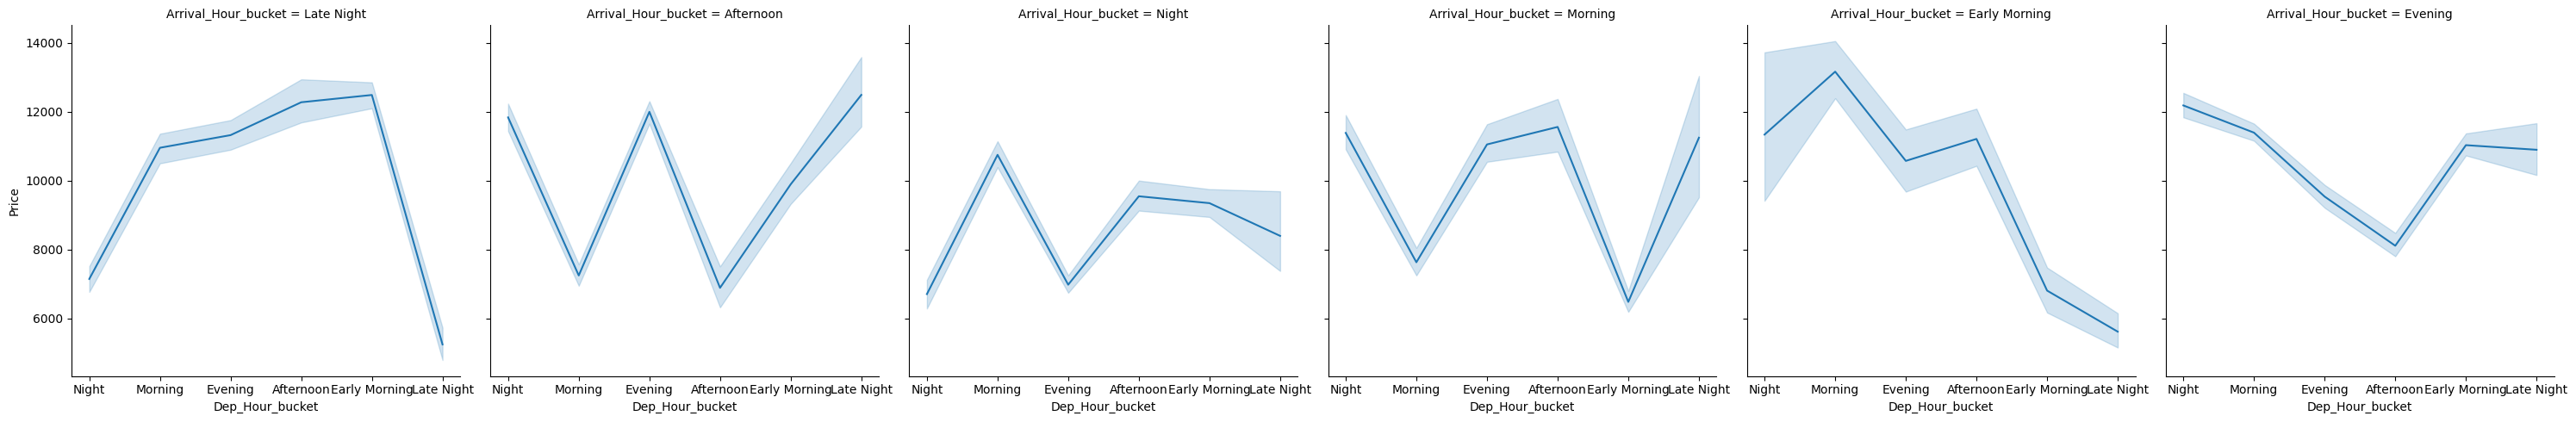

In [ ]:
sns.relplot(x='Dep_Hour_bucket',y='Price',data=df,col='Arrival_Hour_bucket',kind='line')
plt.show()

#**Conclusion**

This exploratory data analysis examined various factors influencing flight ticket prices, including airline, route, number of total stops, journey duration, departure time, and travel day type. The analysis revealed that flight prices are strongly influenced by operational characteristics and travel timing. In this dataset, average ticket prices increase as the number of total stops increases, with non-stop flights having the lowest average price and flights with multiple stops being significantly more expensive. Departure time also impacts pricing, with morning and Evening flights generally showing higher average prices. Additionally, weekend flights tend to have slightly higher average prices compared to weekdays, indicating higher demand during weekend days. Overall, the findings suggest that flight pricing in this dataset is driven by route complexity, scheduling patterns, and demand-based factors.
